In [1]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(model-calibration)=
# The Model Calibration Problem

The model calibration problem is the inverse of the uncertainty propagation problem.
That is why such problems are also called **inverse problems**.
It goes as follows. 
One observes a quantity that the model predicts, and they want to go back and characterize how this observation changes the state of knowledge about the model's parameters.

## Example: Driving a trailer on a rough road

Recall [the trailer example](uncertainty-propagation).
We have a trailer of mass $m$ moving on a rough road with speed $v$.
The suspension spring constant is $k$.
We are interested in the vibration amplitude $X$ of the trailer.

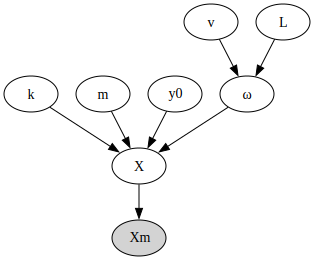

In [1]:
from graphviz import Digraph
g = Digraph('Trailer')
g.node('k')
g.node('m')
g.node('y0', label='<y<sub>0</sub>>')
g.node('omega', label='<&omega;>')
g.node('v')
g.node('L')
g.node('X')
g.edge('v', 'omega')
g.edge('L', 'omega')
g.edge('y0', 'X')
g.edge('omega', 'X')
g.edge('k', 'X')
g.edge('m', 'X')
g.node('Xm', label='<X<sub>m</sub>>', style='filled')
g.edge('X', 'Xm')
g.render('ch1.fig5', format='pdf')
g

We have filled the node $X_m$ with color to indicate that we observe it.
Here the calibration problem is to identify all unknown parameters given the sensor data.
This particular problem is *ill-defined*.
It is impossible to find five variables, $k$, $m$, $y_0$, $v$, and $L$ from a single noisy amplitude measurement.

But we do not give up easily.
We call the manufacturer and ask for the spring constant $k$.
They tell us that it is $k = 1000$ N/m with very small uncertainty.
We also add a sensor to measure the trailer's mass $m$ and another to measure its velocity $v$.
Let $m_m$ and $v_m$ be the measurement from such sensors.

We need to update the causal graph as follows:
+ We shade the spring constant $k$ to indicate that it is known.
+ We add the two new sensors as nodes $m_m$ and $v_m$.
They are shaded to indicate that they are observed.

Here is the new causal graph:

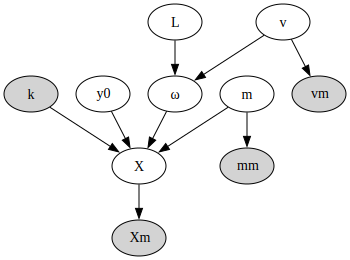

In [2]:
g = Digraph('Trailer')
g.node('k', style='filled')
g.node('m')
g.node('mm', label='<m<sub>m</sub>>', style='filled')
g.node('y0', label='<y<sub>0</sub>>')
g.node('omega', label='<&omega;>')
g.node('v')
g.node('vm', label='<v<sub>m</sub>>', style='filled')
g.node('L')
g.node('X')
g.edge('v', 'omega')
g.edge('v', 'vm')
g.edge('L', 'omega')
g.edge('y0', 'X')
g.edge('omega', 'X')
g.edge('k', 'X')
g.edge('m', 'X')
g.edge('m', 'mm')
g.node('Xm', label='<X<sub>m</sub>>', style='filled')
g.edge('X', 'Xm')
g.render('ch1.fig6', format='pdf')
g

Now $y_0$ and $L$ are identifiable.
The process we just followed reveals something that we do all the time in engineering practice.
Once we realize that a problem is impossible to solve at its present form, we try to gather more information.

## Solving model calibration problems

We need several lectures to understand how to pose and solve the problem.
But here is the answer:
+ First, we need to specify all structural equations of the causal graph by introducing unknown parameters as required. In the diagram above, we had all the structural equations except the ones that connect the sensors to the corresponding variables, i.e., we still need the measurement model, otherwise known as the **likelihood**. 
+ Second, we need to quantify our **prior** knowledge about all the unknown parameters by assigning probability densities to them. The resulting model is typically called a *probabilistic graphical model*. Another commonly used jargon is *Bayesian network* or *hierarchical Bayesian model*.
+ Third, we use some called the "Bayes' rule" to condition our prior knowledge on the observations. This updated knowledge is our **posterior knowledge**. We call this step *Bayesian inference*.
+ Unfortunately, this posterior knowledge is rarely analytically available. So, the fourth step is to create a practical procedure that characterizes our posterior state of knowledge. The most common approach is to sample from the posterior distribution, e.g., via *Markov chain Monte Carlo* (MCMC).
Another approach is to approximate the posterior distribution with a simpler distribution. This approach is called *variational inference*.

The steps above are the core of the Bayesian approach to inverse problems.
It is not only about trailers.
It is about more than just calibrating physical models.
It is about any problem with a model with unknown parameters and some observations we can use to find the parameters.
The problem encompasses all machine learning.
Understanding the Bayesian approach to inverse problems is the key to understanding the state-of-the-art of modern machine learning.
Most algorithms follow the steps above in one way or another.

### Questions

+ Modify the causal graph above to account for an indirect measurement of the spring stiffness
```{admonition} Hint
:class: dropdown
Add new node $k_m$ corresponding to an output of a "stiffness" sensor and connect it to $k$ with an arrow.
```

+ Modify the causal model to add sensors that estimate the wavelength $L$ of the road oscillations, e.g., by taking and analyzing pictures of the road from a vehicle camera.